In [1]:
import numpy as np
import pandas as pd

In [2]:
titanic = pd.read_csv('MIS542_titanic.csv', delimiter = ',')

In [3]:
titanic.head ()

,Survived,Passanger Class,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
# average cost in US dollars of a first-class ticket
ticket = titanic.groupby('Passanger Class').mean()[['Fare in British Pounds']]

In [5]:
print (ticket) #British Pounds
print (ticket*1.28) #US Dollars

                 Fare in British Pounds
Passanger Class                        
1                             84.154687
2                             20.662183
3                             13.707707
                 Fare in British Pounds
Passanger Class                        
1                            107.718000
2                             26.447594
3                             17.545865


In [6]:
# number of passengers over 20 with siblings onboard
over_20 = titanic.loc[(titanic['Age']>=20) & (titanic['Siblings/Spouses Aboard']>=2)]
over_20.head(10)

,Survived,Passanger Class,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds
68,0,3,Mr. Vincenz Kink,male,26.0,2,0,8.6625
84,1,3,Mrs. Karl Alfred (Maria Mathilda Gustafsson) B...,female,33.0,3,0,15.8500
87,1,1,Miss. Mabel Helen Fortune,female,23.0,3,2,263.0000
103,0,3,Mr. Anders Vilhelm Gustafsson,male,37.0,2,0,7.9250
119,0,2,Mr. Stanley George Hickman,male,21.0,2,0,73.5000
244,0,1,Dr. William Edward Minahan,male,44.0,2,0,90.0000
299,1,3,Mr. Bernard McCoy,male,24.0,2,0,23.2500
322,0,3,Mr. George John Jr Sage,male,20.0,8,2,69.5500
328,1,3,Miss. Agnes McCoy,female,28.0,2,0,23.2500
339,1,1,Miss. Alice Elizabeth Fortune,female,24.0,3,2,263.0000


In [7]:
over_20.Age.count()

24

In [8]:
# medium age of those who didn't survive
survive = titanic.groupby('Survived').median()[['Age']]
print (survive)

           Age
Survived      
0         28.0
1         28.0


In [9]:
# of children that did not survive
under_20 = titanic.loc[(titanic['Age']<=19)]
under_20.groupby('Passanger Class').count()[['Age']]

,Age
Passanger Class,
1,21
2,36
3,142


In [10]:
# youngest and oldest person aboard
titanic.Age.min()

0.42

In [11]:
titanic.Age.max()

80.0

In [12]:
# how many female survived vs males
gender = titanic.loc[(titanic['Survived']>=1)]
survive = gender.groupby('Sex').count()[['Survived']]
print (survive)

        Survived
Sex             
female       233
male         109


In [13]:
# how many female did not survive vs males
gender1 = titanic.loc[(titanic['Survived']<=0)]
gender1.groupby('Sex').count()[['Survived']]

,Survived
Sex,
female,81
male,464


In [14]:
# of children in each passenger class
under_20 = titanic.loc[(titanic['Age']<=19)]
under_20.groupby('Passanger Class').count()[['Age']]

,Age
Passanger Class,
1,21
2,36
3,142


In [15]:
# of passengers in each class
titanic.groupby('Passanger Class').count()

,Survived,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds
Passanger Class,,,,,,,
1,216,216,216,216,216,216,216
2,184,184,184,184,184,184,184
3,487,487,487,487,487,487,487


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# pie chart of number of female vs males
titanic.groupby('Sex').count()

,Survived,Passanger Class,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds
Sex,,,,,,,
female,314,314,314,314,314,314,314
male,573,573,573,573,573,573,573


<function matplotlib.pyplot.show(*args, **kw)>

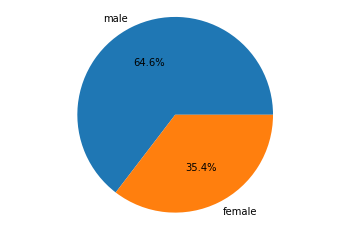

In [18]:
labels = ['male', 'female']
sizes = [573, 314]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

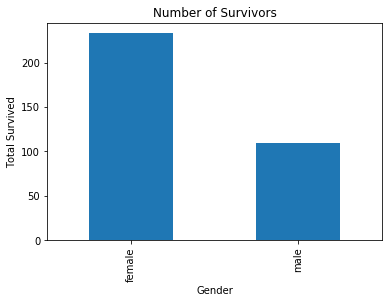

In [19]:
# bar chart total number of male survivors vs female survivors
gender = titanic.loc[(titanic['Survived']>=1)]
gender['Sex'].value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Total Survived")
plt.title("Number of Survivors")
plt.show

Text(0.5, 1.0, 'Total number of passenger per age')

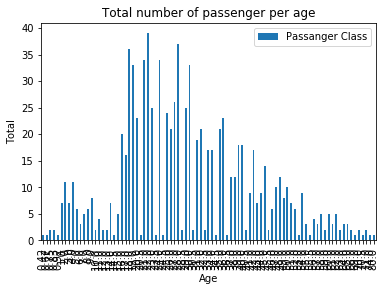

In [20]:
# bar chart to show count of each age
titanic.groupby('Age').count()[['Passanger Class']].plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Total")
plt.title("Total number of passenger per age")

<function matplotlib.pyplot.show(*args, **kw)>

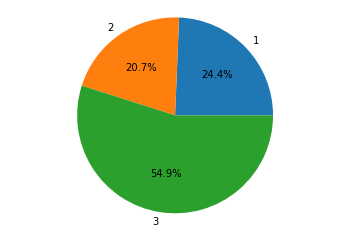

In [21]:
# pie graph for number of passenger in each class
labels = ['1', '2', '3']
sizes = [216, 184, 487]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

plt.show

Text(0.5, 1.0, 'Average ticket price')

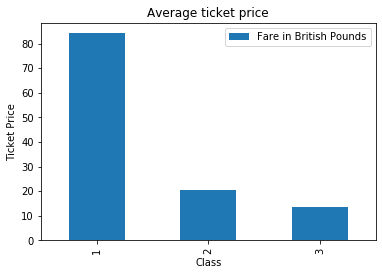

In [22]:
# bar graph of average ticket price
titanic.groupby('Passanger Class').mean()[['Fare in British Pounds']].plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Ticket Price")
plt.title("Average ticket price")

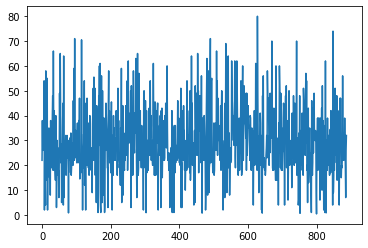

In [24]:
# line plot of passenger's age
data = titanic.Age
plt.plot(data)